<h2>Sequential model</h2>

In [1]:
import nltk
import json
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
import random

import json

2023-04-26 23:26:37.698974: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-26 23:26:37.880091: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-26 23:26:37.881601: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 23:26:40.543164: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:

words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('intents.json').read()
intents = json.loads(data_file)



In [4]:

for intent in intents['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])


In [5]:

words = [(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

classes = sorted(list(set(classes)))
print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique lemmatized words", words)


pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))


872 documents
40 classes ['100soma', '160soma', '200soma', '30soma', '60soma', 'Darkor_100', 'Darkor_160', 'Darkor_200', 'Darkor_30', 'Darkor_60', 'darkor', 'internet_105', 'internet_165', 'internet_205', 'internet_35', 'internet_65', 'internet_tarif', 'megabytes', 'moy_tarif', 'otklyuchit', 'perepodklyuchit', 'salom', 'social_network', 'social_network_105', 'social_network_165', 'social_network_205', 'social_network_65', 'tarif', 'tiktok', 'unlimited', 'unlimited_149', 'unlimited_199', 'unlimited_299', 'unlimited_499', 'unlimited_59', 'unlimited_899', 'unlimited_99', 'whatsapp', 'youtube', 'zhalobi']
1235 unique lemmatized words ["'", "'будь", "'дар", "'коди", '(', ')', '+', '+165', '+59', '+65', '+безлимит', '+безлимит59', '+белимит', '+белимит59с', '+интернет', '+интернет65', '+сотьсети', '+социальные', '+соцсети', '+соцсети65', ',', '-', '.', '...', '1', '10', '100', '1000', '10000', '100000', '101', '1024', '105', '105+', '10гига-безлимитный', '10мб', '128', '128кб/с', '149', '15'

In [6]:
training = []

output_empty = [0] * len(classes)
for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    training.append([bag, output_row])
random.shuffle(training)
training = np.array(training)
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")



Training data created


/tmp/ipykernel_497893/2176452223.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


In [7]:
data_file = open('intents_testing.json').read()
intents_testing= json.loads(data_file)
words_testing=[]
classes_testing = []
documents_testing = []

for intent in intents_testing['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        words_testing.extend(w)
        documents_testing.append((w, intent['tag']))
        if intent['tag'] not in classes_testing:
            classes_testing.append(intent['tag'])

words_testing = [(w.lower()) for w in words_testing if w not in ignore_words]
words_testing = sorted(list(set(words_testing)))

classes_testing = sorted(list(set(classes_testing)))

testing = []

output_empty = [0] * len(classes_testing)
for doc in documents_testing:
    bag = []
    pattern_words = doc[0]
    pattern_words = [(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    output_row = list(output_empty)
    output_row[classes_testing.index(doc[1])] = 1
    
    testing.append([bag, output_row])
random.shuffle(testing)
testing = np.array(testing)
test_x = list(testing[:,0])
test_y = list(testing[:,1])
print("Testing data created")

Testing data created


/tmp/ipykernel_497893/625483166.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  testing = np.array(testing)


heldoo tcell eofldpfm dlldpslfk; lcl xldld7kffp;0 dlf;fre lo ;pdel

In [8]:

# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


/home/student/.local/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
# Train the model on the training data and evaluate it on the testing data
hist = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=275, batch_size=7, verbose=1)


Epoch 1/275
125/125 [==============================] - 2s 11ms/step - loss: 3.5716 - accuracy: 0.0872 - val_loss: 3.7029 - val_accuracy: 0.0132
Epoch 2/275
125/125 [==============================] - 1s 5ms/step - loss: 3.3350 - accuracy: 0.1170 - val_loss: 3.6109 - val_accuracy: 0.0132
Epoch 3/275
125/125 [==============================] - 1s 5ms/step - loss: 3.1512 - accuracy: 0.1743 - val_loss: 3.4900 - val_accuracy: 0.0658
Epoch 4/275
125/125 [==============================] - 1s 4ms/step - loss: 2.9147 - accuracy: 0.2110 - val_loss: 3.3438 - val_accuracy: 0.1184
Epoch 5/275
125/125 [==============================] - 1s 5ms/step - loss: 2.7680 - accuracy: 0.2546 - val_loss: 3.1769 - val_accuracy: 0.1711
Epoch 6/275
125/125 [==============================] - 1s 5ms/step - loss: 2.6017 - accuracy: 0.2913 - val_loss: 2.9586 - val_accuracy: 0.2237
Epoch 7/275
125/125 [==============================] - 1s 5ms/step - loss: 2.4053 - accuracy: 0.3349 - val_loss: 2.8486 - val_accuracy: 0.236

In [10]:

# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(train_x, train_y, verbose=0)
print('Train accuracy:', train_acc)

# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Test accuracy:', test_acc)


Train accuracy: 0.9575688242912292
Test accuracy: 0.7631579041481018


In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get the model's predictions for the training set
y_train_pred = model.predict(train_x)

# Convert the predicted probabilities to binary predictions
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

# Compute the precision, recall, and f1 score
train_precision = precision_score(train_y, y_train_pred_binary, average='weighted')
train_recall = recall_score(train_y, y_train_pred_binary, average='weighted')
train_f1 = f1_score(train_y, y_train_pred_binary, average='weighted')

print('Training precision:', train_precision)
print('Training recall:', train_recall)
print('Training f1 score:', train_f1)


28/28 [==============================] - 0s 2ms/step
Training precision: 0.9738424017622114
Training recall: 0.9495412844036697
Training f1 score: 0.9600910613552234


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get the model's predictions for the test set
y_pred = model.predict(test_x)

# Convert the predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute the precision, recall, and f1 score
precision = precision_score(test_y, y_pred_binary,average='weighted')
recall = recall_score(test_y, y_pred_binary, average='weighted')
f1 = f1_score(test_y, y_pred_binary, average='weighted')

print('Testing precision:', precision)
print('Testing recall:', recall)
print('Testing f1 score:', f1)


3/3 [==============================] - 0s 4ms/step
Testing precision: 0.7600877192982456
Testing recall: 0.7631578947368421
Testing f1 score: 0.7327067669172932


/home/student/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


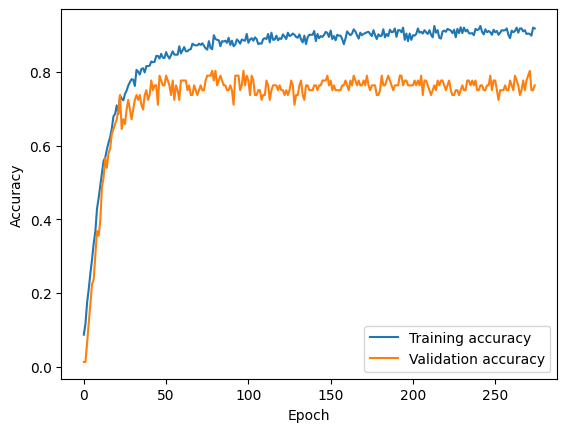

In [13]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over time
plt.plot(hist.history['accuracy'], label='Training accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



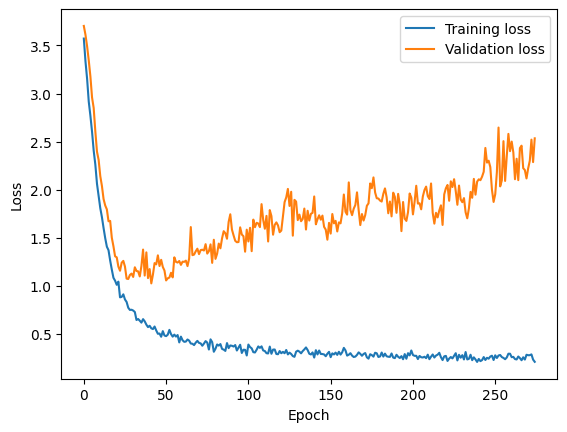

In [14]:

# Plot the training and validation loss over time
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

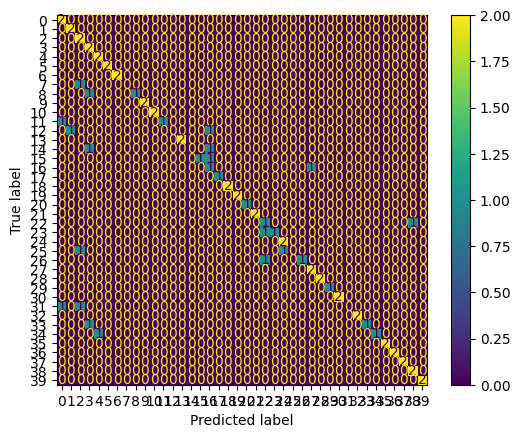

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the predicted classes from the binary predictions
y_pred_classes = np.argmax(y_pred_binary, axis=1)

# Get the true classes from the one-hot encoded test labels
y_true_classes = np.argmax(test_y, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [16]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score



class KerasModel(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        model = keras.Sequential([
            keras.Input(shape=X.shape[1]),
            layers.Dense(120),
            layers.Dropout(0.5),
            layers.Dense(1, activation="relu"),
            layers.Dense(60),
            layers.Dropout(0.5),
            layers.Dense(1, activation="relu"), 
            ])
        model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
        model.fit(X, y, epochs=275, batch_size=7)
        self.model = model
        return self

    def score(self, X, y):
        return accuracy_score(y, (self.model.predict(X) > 0.5).flatten())

In [17]:
if __name__ == "__main__":
    train_x, train_y = make_classification()
    clf = KerasModel()
    print(cross_val_score(clf, train_x, train_y))

Epoch 1/275
12/12 [==============================] - 1s 3ms/step - loss: 3.6520 - accuracy: 0.5250
Epoch 2/275
12/12 [==============================] - 0s 3ms/step - loss: 2.2977 - accuracy: 0.4750
Epoch 3/275
12/12 [==============================] - 0s 3ms/step - loss: 2.1482 - accuracy: 0.4750
Epoch 4/275
12/12 [==============================] - 0s 3ms/step - loss: 1.4735 - accuracy: 0.4500
Epoch 5/275
12/12 [==============================] - 0s 3ms/step - loss: 1.3402 - accuracy: 0.4875
Epoch 6/275
12/12 [==============================] - 0s 3ms/step - loss: 1.4561 - accuracy: 0.5250
Epoch 7/275
12/12 [==============================] - 0s 3ms/step - loss: 1.0021 - accuracy: 0.5625
Epoch 8/275
12/12 [==============================] - 0s 3ms/step - loss: 0.7838 - accuracy: 0.6000
Epoch 9/275
12/12 [==============================] - 0s 3ms/step - loss: 0.8150 - accuracy: 0.5625
Epoch 10/275
12/12 [==============================] - 0s 3ms/step - loss: 0.9430 - accuracy: 0.5875
Epoch 11/